![The Pokémon Logo](images/pokemon-logo.png)

# **Introduction**

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

#### Importing Necessary Libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Data

There are two .csv's that I'll use for this project:

1. Historical Data from TCGPlayer (.csv)
2. Most Popular Pokemon Data (.csv)

In [58]:
# reading in the historical data
hist_df = pd.read_csv("tcgplayer-data.csv")

# showing the first five rows
hist_df.head()

,Card,Set,Number,Rarity,Condition,Volatility,3/18 to 3/24,3/25 to 3/31,4/1 to 4/7,4/8 to 4/14,...,1/6 to 1/12,1/13 to 1/19,1/20 to 1/26,1/27 to 2/2,2/3 to 2/9,2/10 to 2/16,2/17 to 2/23,2/24 to 3/2,3/3 to 3/9,3/10 to 3/16
0,Gengar VMAX,SWSH08: Fusion Strike,271/264,Secret Rare,Near Mint,Med Volatility,228.68,252.39,289.66,312.91,...,657.73,697.20,732.91,744.80,735.06,718.11,719.55,699.55,682.49,679.85
1,Gengar ex,SV05: Temporal Forces,193/162,Ultra Rare,Near Mint,Med Volatility,19.05,13.13,13.78,12.70,...,22.79,24.81,24.98,24.79,24.57,22.54,24.16,25.13,24.15,22.57
2,Gengar,SWSH11: Lost Origin Trainer Gallery,TG06/TG30,Ultra Rare,Near Mint,Med Volatility,2.47,2.57,2.98,2.35,...,10.22,13.40,16.17,15.35,15.00,15.59,19.98,18.98,17.25,16.61
3,Charizard,Base Set,004/102,Holo Rare,Near Mint,Med Volatility,385.66,386.97,370.05,369.79,...,442.48,427.29,406.44,441.24,440.18,378.71,398.63,449.77,453.59,462.27
4,Charizard GX,SM - Burning Shadows,150/147,Secret Rare,Near Mint,Indeterminate Volatility,397.94,397.94,413.30,413.30,...,420.70,411.27,414.50,414.50,414.50,416.27,423.25,423.90,418.99,418.99


In [59]:
# displaying the info of the historical prices data frame
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Card            103 non-null    object 
 1   Set             103 non-null    object 
 2   Number          103 non-null    object 
 3   Rarity          103 non-null    object 
 4   Condition       103 non-null    object 
 5   Volatility      103 non-null    object 
 6   3/18 to 3/24    103 non-null    float64
 7   3/25 to 3/31    103 non-null    float64
 8   4/1 to 4/7      103 non-null    float64
 9   4/8 to 4/14     103 non-null    float64
 10  4/15 to 4/21    103 non-null    float64
 11  4/22 to 4/28    103 non-null    float64
 12  4/29 to 5/5     103 non-null    float64
 13  5/6 to 5/12     103 non-null    float64
 14  5/13 to 5/19    103 non-null    float64
 15  5/20 to 5/26    103 non-null    float64
 16  5/27 to 6/2     103 non-null    float64
 17  6/3 to 6/9      103 non-null    flo

In [60]:
# reading in the popularity data
pop_df = pd.read_csv("pokemon-favorites-list.csv")

# showing the first five rows
pop_df.head()

,Pokemon,Number of votes,Rank
0,Charizard,1107,1
1,Gengar,1056,2
2,Arcanine,923,3
3,Bulbasaur,710,4
4,Blaziken,613,5


#### Upkeep, Merging, and Cleaning Data

Upkeep:
*   Taking a look at both dateframes and getting rid of any columns that aren't going to factor into our analysis.
*   Rearranging columns if they need to be so that readability won't be an issue.
*   Converting title names for consistency
*   Renaming the 'Card' column to 'Pokemon'

In [61]:
print(hist_df.columns)  # remove 'Volatility'

Index(['Card', 'Set', 'Number', 'Rarity', 'Condition', 'Volatility',
       '3/18 to 3/24', '3/25 to 3/31', '4/1 to 4/7', '4/8 to 4/14',
       '4/15 to 4/21', '4/22 to 4/28', '4/29 to 5/5', '5/6 to 5/12',
       '5/13 to 5/19', '5/20 to 5/26', '5/27 to 6/2', '6/3 to 6/9',
       '6/10 to 6/16', '6/17 to 6/23', '6/24 to 6/30', '7/1 to 7/7',
       '7/8 to 7/14', '7/15 to 7/21', '7/22 to 7/28', '7/29 to 8/4',
       '8/5 to 8/11', '8/12 to 8/18', '8/19 to 8/25', '8/26 to 9/1',
       '9/2 to 9/8', '9/9 to 9/15', '9/16 to 9/22', '9/23 to 9/29',
       '9/30 to 10/6', '10/7 to 10/13', '10/14 to 10/20', '10/21 to 10/27',
       '10/28 to 11/3', '11/4 to 11/10', '11/11 to 11/17', '11/18 to 11/24',
       '11/25 to 12/1', '12/2 to 12/8', '12/9 to 12/15', '12/16 to 12/22',
       '12/23 to 12/29', '12/30 to 1/5', '1/6 to 1/12', '1/13 to 1/19',
       '1/20 to 1/26', '1/27 to 2/2', '2/3 to 2/9', '2/10 to 2/16',
       '2/17 to 2/23', '2/24 to 3/2', '3/3 to 3/9', '3/10 to 3/16'],
      dtype='o

In [62]:
print(pop_df.columns)   # remove 'Number of votes'

Index(['Pokemon', 'Number of votes', 'Rank'], dtype='object')


#### Card Data, Historical Prices, and Removal

General upkeep and renaming to prepare for a more seamless merger.  'Volatility' was a novel idea, but it seems like half of the cards have 'Indeterminate Volatility' and that doesn't help with our analysis in this case.  We'll be measuring our own volatility later.

In [63]:
hist_clean = hist_df.drop(columns = ["Volatility"])    # removing the 'Volatility' column

hist_clean.head()  

,Card,Set,Number,Rarity,Condition,3/18 to 3/24,3/25 to 3/31,4/1 to 4/7,4/8 to 4/14,4/15 to 4/21,...,1/6 to 1/12,1/13 to 1/19,1/20 to 1/26,1/27 to 2/2,2/3 to 2/9,2/10 to 2/16,2/17 to 2/23,2/24 to 3/2,3/3 to 3/9,3/10 to 3/16
0,Gengar VMAX,SWSH08: Fusion Strike,271/264,Secret Rare,Near Mint,228.68,252.39,289.66,312.91,314.11,...,657.73,697.20,732.91,744.80,735.06,718.11,719.55,699.55,682.49,679.85
1,Gengar ex,SV05: Temporal Forces,193/162,Ultra Rare,Near Mint,19.05,13.13,13.78,12.70,11.52,...,22.79,24.81,24.98,24.79,24.57,22.54,24.16,25.13,24.15,22.57
2,Gengar,SWSH11: Lost Origin Trainer Gallery,TG06/TG30,Ultra Rare,Near Mint,2.47,2.57,2.98,2.35,2.60,...,10.22,13.40,16.17,15.35,15.00,15.59,19.98,18.98,17.25,16.61
3,Charizard,Base Set,004/102,Holo Rare,Near Mint,385.66,386.97,370.05,369.79,360.99,...,442.48,427.29,406.44,441.24,440.18,378.71,398.63,449.77,453.59,462.27
4,Charizard GX,SM - Burning Shadows,150/147,Secret Rare,Near Mint,397.94,397.94,413.30,413.30,408.31,...,420.70,411.27,414.50,414.50,414.50,416.27,423.25,423.90,418.99,418.99


#### Popularity Rankings

More upkeep and removals...

In [64]:
pop_clean = pop_df.drop(columns = ["Number of votes"])  # removing the 'Number of votes' column
pop_clean.rename(columns = {"Rank": "Popularity"}, inplace = True)  # renaming 'Rank' to 'Popularity Ranking' for clarity

pop_clean.head()

,Pokemon,Popularity
0,Charizard,1
1,Gengar,2
2,Arcanine,3
3,Bulbasaur,4
4,Blaziken,5


In [65]:
# displaying the popularity info
pop_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pokemon     809 non-null    object
 1   Popularity  809 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.8+ KB


#### Data Consistency

Cards come from different sets, eras, and as such have different gimmicks.  Every other column, however, is distinct thanks to the web scraper and foresight.  The popular column only has a few changes that're needed.

That being said, we do have missing values for cards that were released in the last 52 weeks.  We will change those to 'NULL' to avoid price inaccuracies that affect our data as we graph it.

In [66]:
# replacing '0.00' with null values in the 'Price' column
hist_clean.replace(0.0, np.nan, inplace = True)

# checking for card 'Number' '238/191', which is a Pikachu from a set that released late last year to check if our change worked
hist_clean.loc[hist_clean["Number"] == "238/191"]

,Card,Set,Number,Rarity,Condition,3/18 to 3/24,3/25 to 3/31,4/1 to 4/7,4/8 to 4/14,4/15 to 4/21,...,1/6 to 1/12,1/13 to 1/19,1/20 to 1/26,1/27 to 2/2,2/3 to 2/9,2/10 to 2/16,2/17 to 2/23,2/24 to 3/2,3/3 to 3/9,3/10 to 3/16
79,Pikachu ex,SV08: Surging Sparks,238/191,Special Illustration Rare,Near Mint,NaN,NaN,NaN,NaN,NaN,...,476.18,485.95,474.56,468.81,461.43,457.9,456.22,456.14,442.02,442.08


#### Final Preparations to Merge

The Data is still pretty dirty on the names of the cards themselves despite letters (ex, GX, etc.) being descriptive.  It makes it very hard to apply their popularity rankings, so we're going to split and explode on the 'Card' column, and rename the 'Card' in preparation for our merger.

In [67]:
# we split the text in the cells on whitespace, then explode
hist_expand = hist_clean.assign(Card = hist_clean["Card"].str.split()).explode("Card", ignore_index = True)

# renaming 'Card' to 'Pokemon'
hist_expand.rename(columns = {"Card": "Pokemon"}, inplace = True)

hist_expand.head()

,Pokemon,Set,Number,Rarity,Condition,3/18 to 3/24,3/25 to 3/31,4/1 to 4/7,4/8 to 4/14,4/15 to 4/21,...,1/6 to 1/12,1/13 to 1/19,1/20 to 1/26,1/27 to 2/2,2/3 to 2/9,2/10 to 2/16,2/17 to 2/23,2/24 to 3/2,3/3 to 3/9,3/10 to 3/16
0,Gengar,SWSH08: Fusion Strike,271/264,Secret Rare,Near Mint,228.68,252.39,289.66,312.91,314.11,...,657.73,697.20,732.91,744.80,735.06,718.11,719.55,699.55,682.49,679.85
1,VMAX,SWSH08: Fusion Strike,271/264,Secret Rare,Near Mint,228.68,252.39,289.66,312.91,314.11,...,657.73,697.20,732.91,744.80,735.06,718.11,719.55,699.55,682.49,679.85
2,Gengar,SV05: Temporal Forces,193/162,Ultra Rare,Near Mint,19.05,13.13,13.78,12.70,11.52,...,22.79,24.81,24.98,24.79,24.57,22.54,24.16,25.13,24.15,22.57
3,ex,SV05: Temporal Forces,193/162,Ultra Rare,Near Mint,19.05,13.13,13.78,12.70,11.52,...,22.79,24.81,24.98,24.79,24.57,22.54,24.16,25.13,24.15,22.57
4,Gengar,SWSH11: Lost Origin Trainer Gallery,TG06/TG30,Ultra Rare,Near Mint,2.47,2.57,2.98,2.35,2.60,...,10.22,13.40,16.17,15.35,15.00,15.59,19.98,18.98,17.25,16.61


#### Merging Dataframes

With the newly exploded historical dataframe, we're going to merge on 'Pokemon', and then apply the rankings to the card names themselves.  Afterward, we'll drop the rows without rankings, round out the numbers so they're not of the type 'float64' anymore, sort them, and reset our index.

In [68]:
# left-joining on hist_clean and creating a new merged dataframe; I was getting an error 
final_df = hist_expand.merge(pop_clean, on = "Pokemon", how = "left")

# drop rows that have 'NaN' in the 'Popularity' column
final_df = final_df.dropna(subset = "Popularity")

# change from float to int for better presentation (1.0 to 1)
final_df["Popularity"] = final_df["Popularity"].astype("Int64")

# reordering the 'Popularity" column to be second 
pop_move = final_df.pop("Popularity") # 'popping' it out
final_df.insert(1, "Popularity", pop_move) # moving it to the 2 column
final_df = final_df.sort_values(by = "Popularity") # simple sort statement

final_df.head()

# reset index
final_df.reset_index(drop = True, inplace = True)

final_df.info()
final_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pokemon         103 non-null    object 
 1   Popularity      103 non-null    Int64  
 2   Set             103 non-null    object 
 3   Number          103 non-null    object 
 4   Rarity          103 non-null    object 
 5   Condition       103 non-null    object 
 6   3/18 to 3/24    99 non-null     float64
 7   3/25 to 3/31    100 non-null    float64
 8   4/1 to 4/7      100 non-null    float64
 9   4/8 to 4/14     100 non-null    float64
 10  4/15 to 4/21    100 non-null    float64
 11  4/22 to 4/28    100 non-null    float64
 12  4/29 to 5/5     101 non-null    float64
 13  5/6 to 5/12     102 non-null    float64
 14  5/13 to 5/19    102 non-null    float64
 15  5/20 to 5/26    102 non-null    float64
 16  5/27 to 6/2     102 non-null    float64
 17  6/3 to 6/9      102 non-null    flo

,Pokemon,Popularity,Set,Number,Rarity,Condition,3/18 to 3/24,3/25 to 3/31,4/1 to 4/7,4/8 to 4/14,...,1/6 to 1/12,1/13 to 1/19,1/20 to 1/26,1/27 to 2/2,2/3 to 2/9,2/10 to 2/16,2/17 to 2/23,2/24 to 3/2,3/3 to 3/9,3/10 to 3/16
0,Charizard,1,Base Set,004/102,Holo Rare,Near Mint,385.66,386.97,370.05,369.79,...,442.48,427.29,406.44,441.24,440.18,378.71,398.63,449.77,453.59,462.27
1,Charizard,1,SM - Burning Shadows,150/147,Secret Rare,Near Mint,397.94,397.94,413.30,413.30,...,420.70,411.27,414.50,414.50,414.50,416.27,423.25,423.90,418.99,418.99
2,Charizard,1,Shining Fates: Shiny Vault,SV107/SV122,Shiny Holo Rare,Near Mint,84.43,80.23,80.97,81.75,...,110.25,112.29,114.88,115.31,116.20,118.64,119.03,119.82,122.07,120.90
3,Charizard,1,Base Set,004/102,Holo Rare,Damaged,94.61,95.28,94.97,95.41,...,117.74,117.57,124.11,125.22,131.54,136.95,138.45,137.53,138.66,141.42
4,Charizard,1,XY - Flashfire,107/106,Secret Rare,Heavily Played,NaN,31.98,31.98,31.99,...,31.14,31.14,34.28,34.28,34.28,34.28,34.28,34.28,34.28,34.28
5,Gengar,2,SV05: Temporal Forces,193/162,Ultra Rare,Near Mint,19.05,13.13,13.78,12.70,...,22.79,24.81,24.98,24.79,24.57,22.54,24.16,25.13,24.15,22.57
6,Gengar,2,SWSH11: Lost Origin Trainer Gallery,TG06/TG30,Ultra Rare,Near Mint,2.47,2.57,2.98,2.35,...,10.22,13.40,16.17,15.35,15.00,15.59,19.98,18.98,17.25,16.61
7,Gengar,2,SWSH08: Fusion Strike,271/264,Secret Rare,Near Mint,228.68,252.39,289.66,312.91,...,657.73,697.20,732.91,744.80,735.06,718.11,719.55,699.55,682.49,679.85
8,Arcanine,3,SV01: Scarlet & Violet Base Set,224/198,Ultra Rare,Near Mint,4.55,4.77,4.66,5.07,...,5.14,5.51,6.17,6.33,5.67,5.83,6.24,6.06,6.08,6.21
9,Arcanine,3,WoTC Promo,06/53,Promo,Near Mint,8.27,8.07,8.56,8.20,...,9.82,10.00,9.80,10.06,10.17,10.61,10.75,11.92,12.43,12.43


#### Calculate New Values

Now, we'll take some normal financial calculations and numbers for later use in calculations and begin our analysis.

In [69]:
# matching on '/' and 'to' to group columns together for easier calculations
yr_prices = [col for col in final_df.columns if '/' in col and 'to' in col]

# given that we previously changes some values of '0' to 'NaN', we will use NumPy to properly calculate:
pricing_data = final_df[yr_prices].to_numpy()

# taking traditional price stats
final_df["Average"] = np.round(np.mean(pricing_data, axis = 1), 2) # rounding to 2 decimal places with numpy
final_df["Min"] = final_df[yr_prices].min(axis = 1)
final_df["Max"] = final_df[yr_prices].max(axis = 1)
final_df["Range"] = final_df["Max"] - final_df["Min"]

final_df.head(10)

,Pokemon,Popularity,Set,Number,Rarity,Condition,3/18 to 3/24,3/25 to 3/31,4/1 to 4/7,4/8 to 4/14,...,2/3 to 2/9,2/10 to 2/16,2/17 to 2/23,2/24 to 3/2,3/3 to 3/9,3/10 to 3/16,Average,Min,Max,Range
0,Charizard,1,Base Set,004/102,Holo Rare,Near Mint,385.66,386.97,370.05,369.79,...,440.18,378.71,398.63,449.77,453.59,462.27,383.34,323.85,462.27,138.42
1,Charizard,1,SM - Burning Shadows,150/147,Secret Rare,Near Mint,397.94,397.94,413.30,413.30,...,414.50,416.27,423.25,423.90,418.99,418.99,422.71,397.94,439.93,41.99
2,Charizard,1,Shining Fates: Shiny Vault,SV107/SV122,Shiny Holo Rare,Near Mint,84.43,80.23,80.97,81.75,...,116.20,118.64,119.03,119.82,122.07,120.90,91.34,74.14,122.07,47.93
3,Charizard,1,Base Set,004/102,Holo Rare,Damaged,94.61,95.28,94.97,95.41,...,131.54,136.95,138.45,137.53,138.66,141.42,103.99,81.56,141.42,59.86
4,Charizard,1,XY - Flashfire,107/106,Secret Rare,Heavily Played,NaN,31.98,31.98,31.99,...,34.28,34.28,34.28,34.28,34.28,34.28,NaN,30.53,40.99,10.46
5,Gengar,2,SV05: Temporal Forces,193/162,Ultra Rare,Near Mint,19.05,13.13,13.78,12.70,...,24.57,22.54,24.16,25.13,24.15,22.57,15.16,9.10,25.13,16.03
6,Gengar,2,SWSH11: Lost Origin Trainer Gallery,TG06/TG30,Ultra Rare,Near Mint,2.47,2.57,2.98,2.35,...,15.00,15.59,19.98,18.98,17.25,16.61,7.01,2.35,19.98,17.63
7,Gengar,2,SWSH08: Fusion Strike,271/264,Secret Rare,Near Mint,228.68,252.39,289.66,312.91,...,735.06,718.11,719.55,699.55,682.49,679.85,422.19,228.68,744.80,516.12
8,Arcanine,3,SV01: Scarlet & Violet Base Set,224/198,Ultra Rare,Near Mint,4.55,4.77,4.66,5.07,...,5.67,5.83,6.24,6.06,6.08,6.21,4.95,3.72,6.33,2.61
9,Arcanine,3,WoTC Promo,06/53,Promo,Near Mint,8.27,8.07,8.56,8.20,...,10.17,10.61,10.75,11.92,12.43,12.43,8.90,7.34,12.43,5.09


***

First thing that any Pokemon TCG hobbyist will tell you, if prompted, is that the relationship between popularity and high prices isn't as tight as one would be lead to believe.  This isn't to mention that there's just far too many rarities to truly quantify, but I thought it was worth the mention considering that's how pricing usually works in the real world.

I purposefully web scraped some cheaper versions of the more mundane favorites, while still keeping their rarities and found that the cost was never along the Pokemon-Rarity relationship.  Rather, it was just the rarity themselves.  The card art would best be applicable, but that kind of data is outside the scope of this analysis for the time being.

***

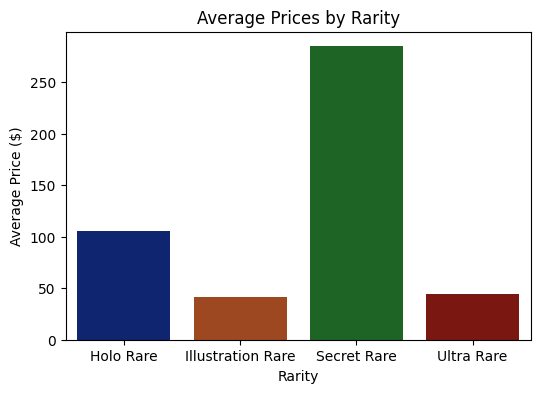

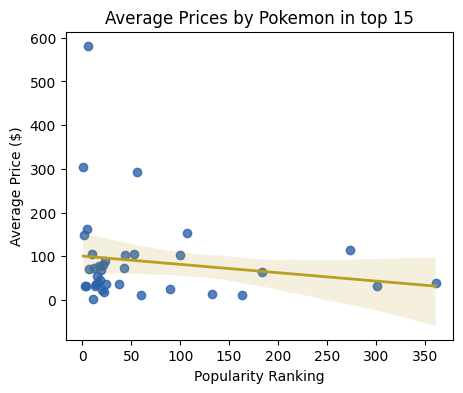

In [70]:
# gathering up rarities since we can't pass a str
rarities = ["Secret Rare", "Ultra Rare", "Illustration Rare", "Holo Rare"]
filter_on_rarities = final_df[final_df["Rarity"].isin(rarities)] # pulling all of them

# then we'll group them up and average them out
avg_rarity = filter_on_rarities.groupby("Rarity")["Average"].mean().reset_index()

plt.figure(figsize = (6, 4)) # making graphs a little more compact than (10, 6)
sns.barplot( # setting the axes, the data to pull from, and the palette to make it more presentable
    x = "Rarity",
    y = "Average",
    data = avg_rarity,
    hue = "Rarity",
    palette = "dark"
    )
plt.title("Average Prices by Rarity")
plt.xlabel("Rarity")
plt.ylabel("Average Price ($)")
plt.show()

# now we'll also add a boxplot to show that Pokemon and their popularity don't wholly push their prices alone
# setting up
avg_pokemon = filter_on_rarities.groupby("Popularity")["Average"].mean().reset_index()

plt.figure(figsize = (5, 4))
sns.regplot(
    x = "Popularity",
    y = "Average",
    data = avg_pokemon,
    scatter_kws = {"color": "#2c62aa"},
    line_kws = {"color": "#b79f21", "lw": 2}
)
plt.title("Average Prices by Pokemon in top 15")
plt.xlabel("Popularity Ranking")
plt.ylabel("Average Price ($)")
plt.show()

***

So, while the the price might not be as tightly wound to the Pokemon in the card itself, there is very much a relationship between them.  It's just not as indicative as the rarity **joined** with the popular Pokemon.  I don't think it takes someone well-versed in the market itself to understand that companies will make cards of higher rarity for those specific Pokemon.  This was a test of that and, on its face, it seems true enough, but there are more tests we can try.

On that note, next in-line are the 'Popularity'-centric metrics and how we can infer from those.  Since, in this analysis, t'would seem that rarity plays a much bigger part in assigning prices to cards.  That being said, maybe we can see how volatile some of the more popular Pokemon are and how their prices fluctuate.

**Price-to-Popularity Ratio** (*PPR*): Since 'lower' ranks (i.e. '1'st for Charizard, '2'nd for Gengar, and so on) means that a card is more popular, we can highlight that and see if these cards truly do command a higher premium through the PPR:

$$PPR = \frac{Average Price}{Popularity}$$

**Popularity-Adjusted Volatility** (*PAV*): Price volatility is another avenue concerning popularity that we can check to determine if it differs.

$$PAV = \frac{Range (max - min)}{Popularity}$$

***

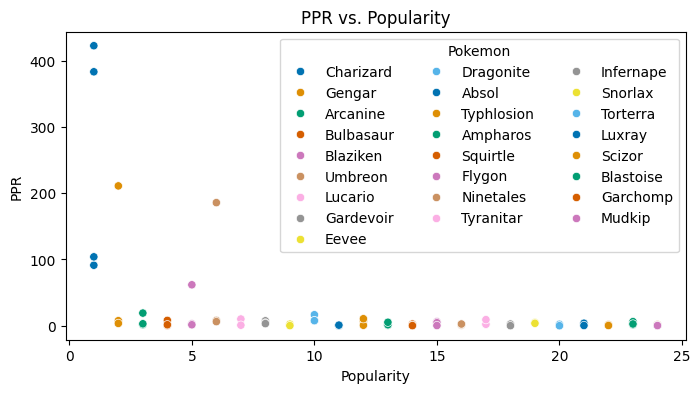

In [ ]:
# setting up our variables and narrowing down to the top 25
final_df["PPR"] = final_df["Average"] / final_df["Popularity"]
final_df["PAV"] = final_df["Range"] / final_df["Popularity"]
top_25 = final_df[final_df["Popularity"] <= 26]

# making our graphs
plt.figure(figsize = (8, 4))
sns.scatterplot(
    x = "Popularity",
    y = "PPR",
    data = top_25,
    hue = "Pokemon",
    palette = "colorblind",
)
plt.legend(
    title = "Pokemon",
    loc = "upper right",
    ncol = 3,
)

plt.title("PPR vs. Popularity")
plt.xlabel("Popularity")
plt.ylabel("PPR")
plt.show() 

